Logistic Regression that determines if the user has diabetes from the glucose level, BMI, and age


In [2]:
#import required librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#turn dataset into a data frame
df = pd.read_csv('diabetes.csv')


In [4]:
print(df.info()) #details about the data
print(df.head()) #print first few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8     

From the plot, we can see that these 2 features arent the best to choose for logistic regression.

In [19]:
# Count how many zeros in each column
(df == 0).sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,500


In [20]:
# Features that shouldn't have zero
columns_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0s with NaN
df[columns_to_fix] = df[columns_to_fix].replace(0, np.nan)

In [24]:
df.isna().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [25]:
df.fillna(df.median(), inplace=True)

In [26]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


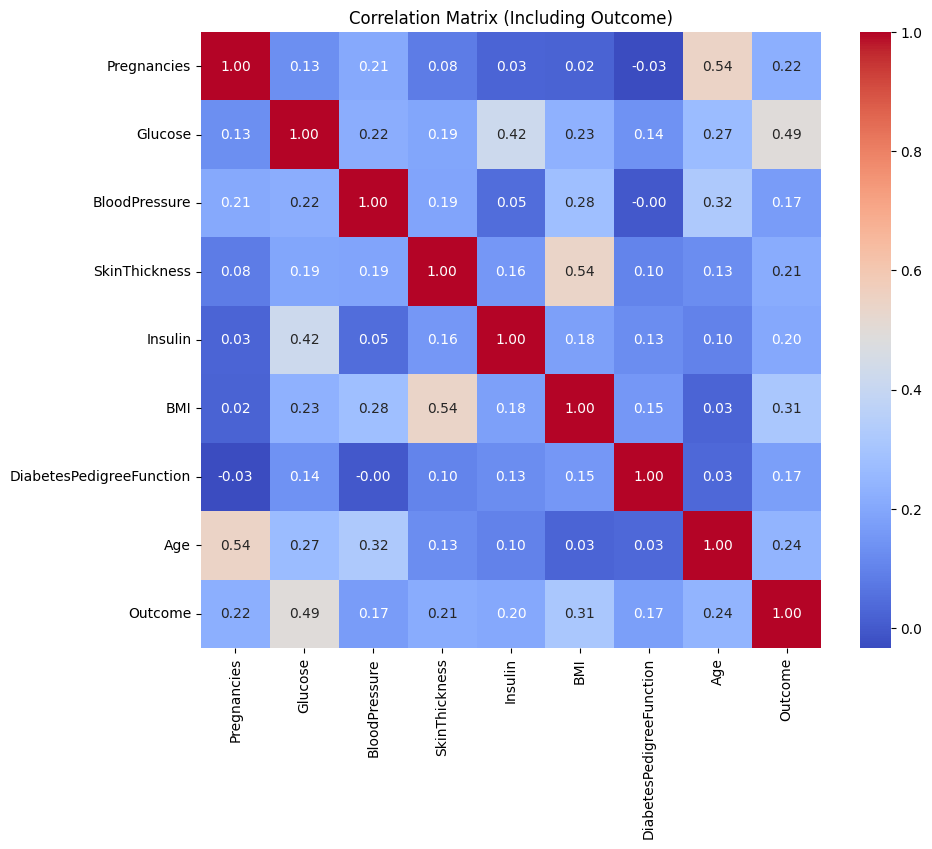

In [27]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Including Outcome)")
plt.show()

<Axes: xlabel='Glucose', ylabel='BloodPressure'>

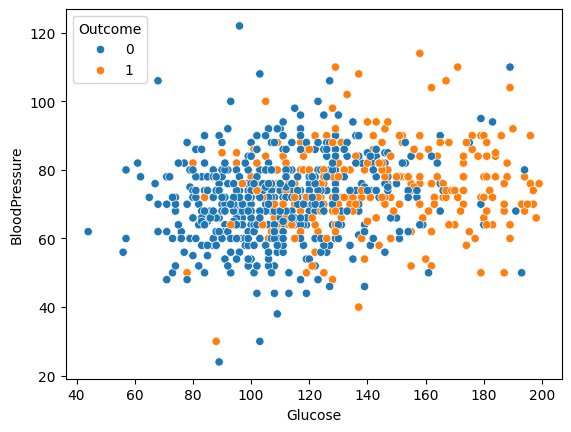

In [28]:
#Scatter plot between Glucose and Blood Pressure
sns.scatterplot(x=df['Glucose'], y=df['BloodPressure'], hue=df['Outcome'])

<Axes: xlabel='Glucose', ylabel='BMI'>

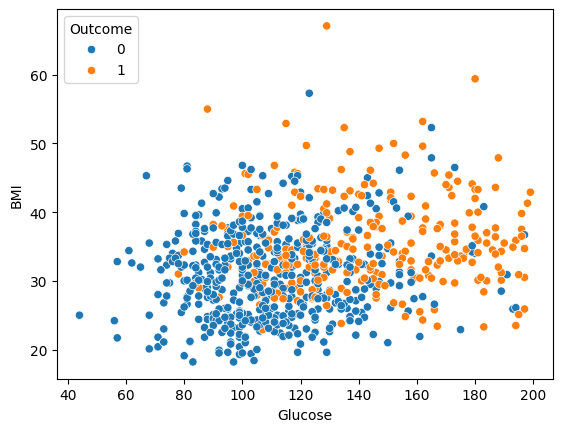

In [29]:
#Scatter plot between Glucose and BMI
sns.scatterplot(x=df['Glucose'], y=df['BMI'], hue=df['Outcome'])

<Axes: xlabel='Glucose', ylabel='Age'>

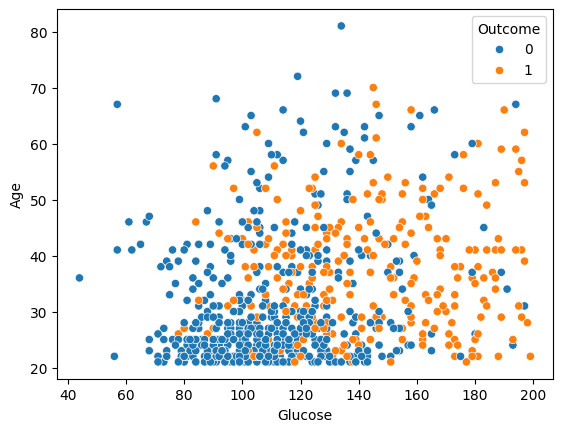

In [30]:
#Scatter plot between Glucose and Age
sns.scatterplot(x=df['Glucose'], y=df['Age'], hue=df['Outcome'])

Using the correlation matrix and the scattor plots, I'd decided to take the Glucose, BMI, and Age for this logistic Regression


In [31]:
X = df[['Glucose', 'BMI', 'Age']] #X --> independent features
y = df['Outcome'] #y --> target variable

In [32]:
X

,Glucose,BMI,Age
0,148.0,33.6,50
1,85.0,26.6,31
2,183.0,23.3,32
3,89.0,28.1,21
4,137.0,43.1,33
...,...,...,...
763,101.0,32.9,63
764,122.0,36.8,27
765,121.0,26.2,30
766,126.0,30.1,47


In [33]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [34]:
# Split before scaling
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 3), (154, 3), (614,), (154,))

In [35]:
#Scale the features
from sklearn.preprocessing import MinMaxScaler

# Fit the scaler only on training data, then transform both
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [36]:
X_train_scaled

array([[0.25806452, 0.28834356, 0.        ],
       [0.43870968, 0.20449898, 0.48333333],
       [0.61290323, 0.21472393, 0.01666667],
       ...,
       [0.36774194, 0.5603272 , 0.28333333],
       [0.62580645, 0.49488753, 0.13333333],
       [0.52258065, 0.08793456, 0.        ]])

In [37]:
#
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy, 4))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7532

Confusion Matrix:
[[84 15]
 [23 32]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        99
           1       0.68      0.58      0.63        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



Accuracy --> The model predicted correctly about 75.32% of the time on the test data.

Confusion Matrix:


84 people without diabetes were correctly identified.

32 people with diabetes were correctly identified.

15 were wrongly predicted as diabetic (FP).

23 were diabetic but the model missed them (FN).



Class 0 - No diabetes:

Precision --> 79% no diabetes was correct

Recall --> caught 85% of all people who actually don’t have diabetes.

F1 Score --> 82% balanced score between precision and recall.

Class 1 - Yes diabetes:

Precision --> 68% yes diabetes was correct

Recall --> caught 58% of all people who actually did have diabetes (not great)

F1 Score --> 63% lower than Class 0 because recall is weaker.



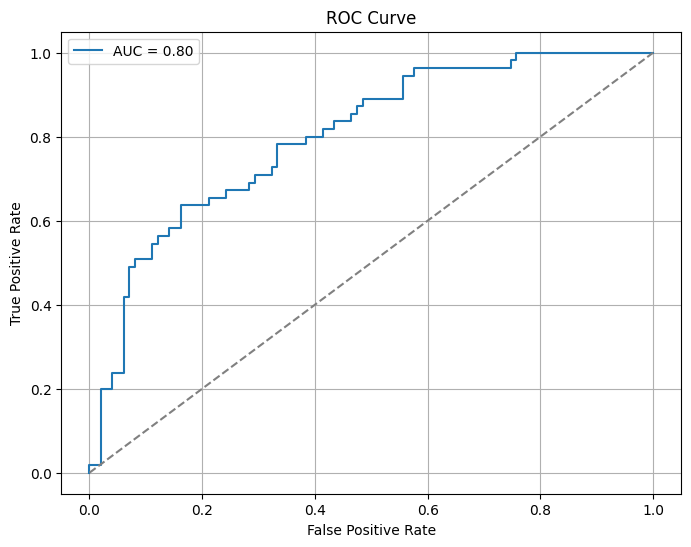

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get prediction probabilities
y_probs = model.predict_proba(X_test_scaled)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# AUC score
auc = roc_auc_score(y_test, y_probs)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


In [40]:

#Ask user for input

glucose = float(input("Enter your glucose level: "))
bmi = float(input("Enter your BMI: "))
age = float(input("Enter your age: "))

user_data = [[glucose, bmi, age]]

# Scale the user input
user_data_scaled = scaler.transform(user_data)

# Make a prediction
prediction = model.predict(user_data_scaled)
probability = model.predict_proba(user_data_scaled)[0][1]  # Probability of having diabetes

# Display the result
if prediction[0] == 1:
    print(f"\n🚨 The model predicts that you may have diabetes.")
else:
    print(f"\n✅ The model predicts that you likely do NOT have diabetes.")

print(f"Probability of having diabetes: {probability:.2f}")

Enter your glucose level: 160
Enter your BMI: 25
Enter your age: 60

🚨 The model predicts that you may have diabetes.
Probability of having diabetes: 0.66


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
